In [1]:
import os, inspect, sys
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))

sys.path.insert(0, r'C:\Users\tglaubach\repos\mke-requirement-suite')

In [2]:

from ReqTracker.io.xlsx_io import load_reqs_from_xlsx, construct_tree
from ReqTracker.io.json_io import load_json, save_json

from ReqTracker.ui.annotation_vis import make_annotation_plot
from ReqTracker.ui.sunburst_vis import make_sunburst_plot
from ReqTracker.core.ReqTree import VerificationEvent, Requirement, RequirementContainer
from ReqTracker.core.tree_helpers import from_dict


In [3]:

# tree = load_reqs_from_xlsx(parent_dir + r'\scripts\req_db.xlsx')   
tree = construct_tree(r'C:\Users\tglaubach\repos\mke-requirement-suite\scripts\req_db.xlsx')

In [4]:

elements = tree.flatten()
print('-'*100)
for el in elements:
    print(el.id, hash(el))

----------------------------------------------------------------------------------------------------
R.DS.I.2 -6720107416186413056
R.DS.W.3 -5196098201249978358
R.DS.SOW.32 -8015067823703177204
VR.RREL.P.57 -8693414608917923826
VA.OLTR_POC.D.## -6513029407932858343
R.DS.SAF.1 -3252573389907541988
R.DS.CM.7 7274202764030359588
R.DS.ILS.36 4225368137592131626
VT.SSRE_EL.D.## 2764377021983981611
VR.OBP.P.52.BUD 3477525164105486383
R.DS.SM.37 -6103036770307624911
R.DS.P.2 -197944243116984269
VE.OREP.D.## -985242771715006412
R.DS.SOW.26 6962585242089297977
R.DS.P.8 -118965187837708231
R.DS.LPS.10 -7631591035415173063
R.DS.RFI.3 8234860161872912453
VR.STRA.BUD 5739608900865308749
R.DS.CM.2 5986086211874388048
VR.RREL.P.59 325827036578355295
VR.HOL24.P.12 3128568242534840425
VR.OREL.P.60.BUD -2554390170891036556
VA.RBPP_SOC.D.## 3015855860887031926
VA.SLIM_EL.D.## 4476340397316216957
R.DS.ILS.2 4815702580334049405
R.DS.CM.1 4173365718467928191
R.DS.HF.4 -3101632184018194285
R.DS.PWM.8 -290001

In [5]:
import plotly.graph_objects as go
import plotly.express as px

In [6]:
subtree = tree
# subtree = [el for el in tree.flatten() if el.id.startswith('R.DS.P.56')][0]

In [7]:
nodes = subtree.flatten()

In [8]:
# nodes = [el for el in tree.flatten() if el.id.startswith('R.DS.P.5') or el.id == 'root']

In [9]:
# nodes += [el for el in nodes if el.id == 'R.DS.P.50'][0].children
# nodes += [el for el in nodes if el.id == 'VR.OBP.P.50.BUD'][0].children
# nodes += [el for el in nodes if el.children and el.id != 'root'][0].children

In [10]:
[(el.id, el.parent.id if el.parent else None) for el in nodes]


[('R.DS.I.2', 'root'),
 ('R.DS.W.3', 'root'),
 ('R.DS.SOW.32', 'root'),
 ('VR.RREL.P.57', 'R.DS.P.57'),
 ('VA.OLTR_POC.D.##', 'VR.OLTR.P.62.BUD'),
 ('R.DS.SAF.1', 'root'),
 ('R.DS.CM.7', 'root'),
 ('R.DS.ILS.36', 'root'),
 ('VT.SSRE_EL.D.##', 'VE.SSRE_EL.D.##'),
 ('VR.OBP.P.52.BUD', 'R.DS.P.52'),
 ('R.DS.SM.37', 'root'),
 ('R.DS.P.2', 'root'),
 ('VE.OREP.D.##', 'root'),
 ('R.DS.SOW.26', 'root'),
 ('R.DS.P.8', 'root'),
 ('R.DS.LPS.10', 'root'),
 ('R.DS.RFI.3', 'root'),
 ('VR.STRA.BUD', 'R.DS.P.43'),
 ('R.DS.CM.2', 'root'),
 ('VR.RREL.P.59', 'R.DS.P.59'),
 ('VR.HOL24.P.12', 'R.DS.P.12'),
 ('VR.OREL.P.60.BUD', 'R.DS.P.60'),
 ('VA.RBPP_SOC.D.##', 'VR.RBP.P.51'),
 ('VA.SLIM_EL.D.##', 'R.DS.P.16'),
 ('R.DS.ILS.2', 'root'),
 ('R.DS.CM.1', 'root'),
 ('R.DS.HF.4', 'root'),
 ('R.DS.PWM.8', 'root'),
 ('VE.SSRE_FI.D.##', 'R.DS.P.34'),
 ('R.DS.P.10', 'root'),
 ('VR.OLTR.P.67.BUD', 'R.DS.P.67'),
 ('VE.RSPEM.D.##', 'VA.RBPP_POC.D.##'),
 ('R.DS.P.20', 'root'),
 ('R.DS.SOW.10', 'root'),
 ('R.DS.PR.8', 

In [16]:
# nodes = [el for el in elements if el.children][:10]

nodes = [el for el in nodes if el.id != 'root']
for el in nodes:
    if el.parent and el.parent.id == 'root':
        el.parent = None
        

# print(data['color'])
color_col = 'color'
color = [getattr(node, color_col) for node in nodes]

data = {
        "text":      [node.id for node in nodes],
        "parents":    [node.parent.full_id if node.parent else '' for node in nodes],
        "hovertext": [node.hovertext for node in nodes],
        "color":     color,
        'ids':       [node.full_id for node in nodes],
    }



In [17]:
[el.id for el in elements]

['R.DS.I.2',
 'R.DS.W.3',
 'R.DS.SOW.32',
 'VR.RREL.P.57',
 'VA.OLTR_POC.D.##',
 'R.DS.SAF.1',
 'R.DS.CM.7',
 'R.DS.ILS.36',
 'VT.SSRE_EL.D.##',
 'VR.OBP.P.52.BUD',
 'R.DS.SM.37',
 'R.DS.P.2',
 'VE.OREP.D.##',
 'R.DS.SOW.26',
 'R.DS.P.8',
 'R.DS.LPS.10',
 'R.DS.RFI.3',
 'VR.STRA.BUD',
 'R.DS.CM.2',
 'VR.RREL.P.59',
 'VR.HOL24.P.12',
 'VR.OREL.P.60.BUD',
 'VA.RBPP_SOC.D.##',
 'VA.SLIM_EL.D.##',
 'R.DS.ILS.2',
 'R.DS.CM.1',
 'R.DS.HF.4',
 'R.DS.PWM.8',
 'VE.SSRE_FI.D.##',
 'R.DS.P.10',
 'VR.OLTR.P.67.BUD',
 'VE.RSPEM.D.##',
 'R.DS.P.20',
 'R.DS.SOW.10',
 'R.DS.PR.8',
 'R.DS.ILS.12',
 'R.DS.DC.3',
 'R.DS.ED.11',
 'R.DS.ILS.32',
 'VT.OBPT.D.##',
 'R.DS.LPS.1',
 'VS.STRA',
 'R.DS.SM.26',
 'R.DS.P.32',
 'R.DS.LPS.6',
 'R.DS.W.2',
 'R.DS.CM.10',
 'R.DS.RFI.6',
 'R.DS.SAF.22',
 'R.DS.G.12',
 'R.DS.RFI.9 ',
 'R.DS.PWM.4',
 'R.DS.P.48',
 'R.DS.ILS.43',
 'VE.OBPP.D.##',
 'R.DS.P.7',
 'R.DS.SAF.20',
 'VE.SLIM_EL.D.##',
 'R.DS.ILS.27',
 'VR.OREL.P.61.BUD',
 'VR.DS.P.22.SOC',
 'R.DS.P.5',
 'R.DS.ILS

In [18]:
[el.full_id for el in elements if el.id == 'VT.SLIM.D.##']

['R.DS.P.16|VA.SLIM_EL.D.##|VE.SLIM_EL.D.##|VT.SLIM.D.##']

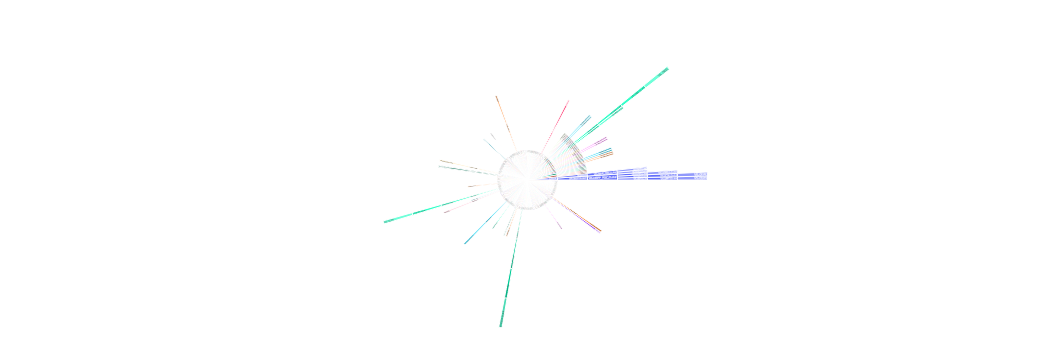

In [19]:


fig = px.sunburst(
    data,
    names='text',
    parents='parents',
    # color='color',
    # hover_name='hovertext',
    ids='ids'
)

fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()